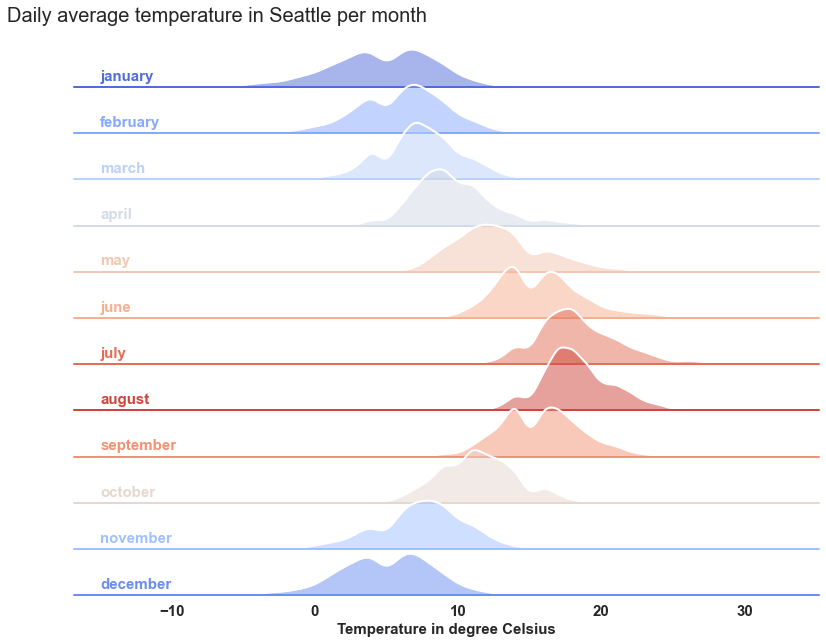

In [52]:
# 능선 그래프
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data
# 1950년 2010년 사이의 시애틀의 평균 기온
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv')

# month 분리
temp['month'] = pd.to_datetime(temp['Date']).dt.month
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'
              }
temp['month'] = temp['month'].map(month_dict)

# 월 평균 온도 매핑
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

# 기본설정
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# 색상 palette 설정
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# FacetGrid 설정 : 여러개의 그래프 표현
g = sns.FacetGrid(temp,
                  row='month',           # 행
                  hue='mean_month',      # 색조
                  aspect=15,             # 너비
                  height=0.75,           # 높이
                  palette=pal            # palette 색상
                  )

# kdeplot 추가
g.map(sns.kdeplot,
      'Mean_TemperatureC',
      bw_adjust=1,                       # 곡선 굴곡(윤곽선)
      clip_on=False,                     # 그래프가 범위를 넘어가더라도 자르지 않고 그림
      fill=True,                         # 밀도 곡선 아래 영역을 채움
      alpha=0.5,                         # 영역 명암
      linewidth=0                        # 곡선 굵기
      )

# kdeplot에서 윤곽선 추가
g.map(sns.kdeplot,
      'Mean_TemperatureC', 
      bw_adjust=1,                       # 곡선 굴곡(윤곽선)
      clip_on=False,                     # 그래프가 범위를 넘어가더라도 자르지 않고 그림
      color="w",                         # 윤곽선의 색상
      lw=2                               # 윤곽선의 굵기
      )

# 수평선 추가
g.map(plt.axhline,                       # 수평선을 그리는 함수
      y=0,                               # 수평선의 위치
      lw=2,                              # 수평선의 굵기
      clip_on=False                      # 그래프가 범위를 넘어가더라도 자르지 않고 그림
      )

# 각 축에 텍스트 추가
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02,                          # 텍스트의 위치
            month_dict[i+1],                    # month_dict에서 해당 텍스트를 가져옴
            fontweight='bold',                  # 텍스트 굵기
            fontsize=15,                        # 텍스트 사이즈
            color=ax.lines[-1].get_color())     # 텍스트의 색상을 해당축의 컬러와 동일하게

# 그래프 겹치기 효과
g.fig.subplots_adjust(hspace=-0.3)

# 축 제곰목 제거 및 추가 설정
g.set_titles("")
g.set(yticks=[])
g.set(ylabel="")
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20
               )

plt.show()
